# Time-Framing / Windowng
related:

STFT --> Short Time Fourier Transform benutzt Windowing/Time-Framing

Im Gegensatz dazu:

FT --> Fourier Transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

## ADSR-enveloped Signal erstellen

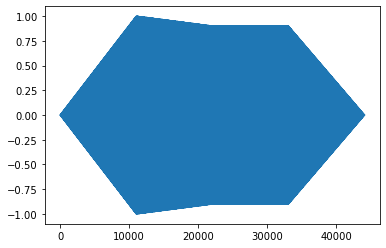

In [2]:
sr = 44100
length = 1
freq = 800
t = np.linspace(0, length, int(length * sr))
x = np.sin(t * 2 * np.pi * freq)

env_part_length = int(sr * length / 4)
decay_val = 0.9
a = np.linspace(0, 1, env_part_length)
d = np.linspace(1, decay_val, env_part_length)
s = np.ones(env_part_length) * decay_val
r = np.linspace(decay_val, 0, env_part_length)
env = np.concatenate((a, d, s, r))

x = x * env

plt.plot(x)
plt.show()

display(Audio(x, rate=sr))

## Windowing / Time-Framing
also see: [min max](/topics/numpy.md#min%20max)

In [3]:
a = np.random.randint(0, 100, 10)

print(a)

print(np.max(a))

[69 19 27 46 42 94 96 37 64 79]
96


also see: [Teilung ohne Rest](/topics/Python.md#Teilung%20ohne%20Rest)

147


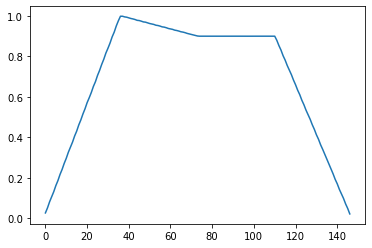

In [4]:
# szenario: no overlap
window_size = 300

num_windows = x.size // window_size

print(num_windows)

amp_env = np.zeros(num_windows)

for i in range(num_windows):
    start_idx = i * window_size
    stop_idx = (i + 1) * window_size
    # print(i, start_idx, stop_idx)
    win = x[start_idx:stop_idx]

    amp_env[i] = np.max(win)

plt.plot(amp_env)
plt.show()

438


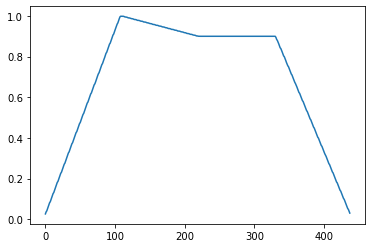

In [5]:
# szenario :overlap
window_size = 300
hop_size = 100

num_windows = (x.size - window_size) // hop_size

print(num_windows)

amp_env = np.zeros(num_windows)

for i in range(num_windows):
    start_idx = i * hop_size
    stop_idx = start_idx + window_size
#     print(i, start_idx, stop_idx)
    win = x[start_idx:stop_idx]

    amp_env[i] = np.max(win)

plt.plot(amp_env)
plt.show()

### Try out on 'real-world' file

In [6]:
import librosa as lr

In [7]:
x, sr = lr.load('../data/flute.mp3')

display(Audio(x, rate=sr))

/Users/danielhopfner/miniconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [8]:
def calc_amp_env(x, window_size, hop_size):
    num_windows = (x.size - window_size) // hop_size # teilung ohne rest --> python-topic
    # print(num_windows)
    max_env = np.zeros(num_windows)
    min_env = np.zeros(num_windows)
    mean_env = np.zeros(num_windows)

    for i in range(num_windows):
        start_idx = i * hop_size
        stop_idx = start_idx + window_size
        # print(i, start_idx, stop_idx)
        win = x[start_idx:stop_idx]

        max_env[i] = np.max(win)
        min_env[i] = np.min(win)
        mean_env[i] = np.mean(np.abs(win)) # --> numpy-topic

    return [max_env, min_env, mean_env]

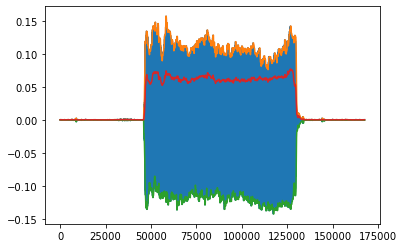

In [9]:
window_size = 300
hop_size = 100

max_env, min_env, mean_env = calc_amp_env(x, window_size, hop_size)

plt.plot(x)
plt.plot(np.linspace(0, x.size, max_env.size), max_env)
plt.plot(np.linspace(0, x.size, min_env.size), min_env)
plt.plot(np.linspace(0, x.size, mean_env.size), mean_env)
plt.show()

In [10]:
# mean
# max --> positive peak
# min --> negative peak
# rms --> root mean square

# lufs 

## Resources
1. 